In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
from sklearn.model_selection import train_test_split

from skimage.util import montage as montage2d
from conv import ConvRNN2D, ConvFF2DCell, ConvFF2D
from keras.models import model_from_json


In [11]:
from keras.layers import ConvLSTM2D, Bidirectional, BatchNormalization, Conv3D, Cropping3D, ZeroPadding3D
from keras.models import Sequential
sim_model = Sequential()
sim_model.add(BatchNormalization(input_shape = (None, None, None, 1)))
sim_model.add(Conv3D(8, 
                     kernel_size = (1, 5, 5), 
                     padding = 'same',
                     activation = 'relu'))
sim_model.add(Conv3D(8, 
                     kernel_size = (3, 3, 3), 
                     padding = 'same',
                     activation = 'relu'))
sim_model.add(BatchNormalization())
sim_model.add(Bidirectional(ConvFF2D(16, 
                                       kernel_size = (3, 3),
                                       padding = 'same',
                                       return_sequences = True)))
sim_model.add(Bidirectional(ConvFF2D(32, 
                                       kernel_size = (3, 3),
                                       padding = 'same',
                                       return_sequences = True)))
sim_model.add(Conv3D(8, 
                     kernel_size = (1, 3, 3), 
                     padding = 'same',
                     activation = 'relu'))
sim_model.add(Conv3D(1, 
                     kernel_size = (1,1,1), 
                     activation = 'sigmoid'))
sim_model.add(Cropping3D((1, 2, 2))) # avoid skewing boundaries
sim_model.add(ZeroPadding3D((1, 2, 2)))
sim_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, None, None, None,  4         
_________________________________________________________________
conv3d (Conv3D)              (None, None, None, None,  208       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, None, None, None,  1736      
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, None,  32        
_________________________________________________________________
bidirectional (Bidirectional (None, None, None, None,  13888     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, None, None,  73856     
_________________________________________________________________
conv3d_2 (Conv3D)            (None, None, None, None,  4

In [12]:
sim_model.load_weights('convlstm_model_weights.best.hdf5')


loaded_data = np.load('prediction_array.npy')


pred_seg = sim_model.predict(loaded_data)


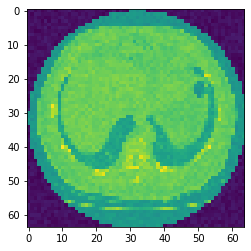

In [24]:
plt.imshow(loaded_data[0][100])

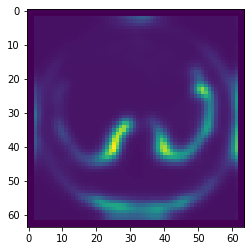

In [25]:
plt.imshow(pred_seg[0][100])